In [ ]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

random_state = 42

# 1

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tracce altro drive/13-01-2022/exam2022_01_13.csv')
display(df)

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [ ]:
print("number of rows {} and number of columns {}".format(df.shape[0],df.shape[1]))

number of rows 329 and number of columns 13


In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,321.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.411215,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.027840,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.090180,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.327718,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.512083,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


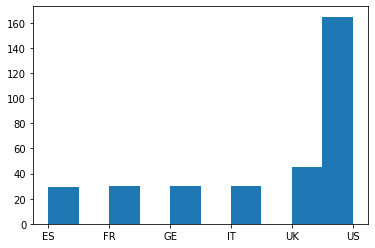

In [ ]:
plt.hist(df['language'])
plt.show()

# 2

In [ ]:
print('number of rows with null values')
df.shape[0] - df.dropna().shape[0]

number of rows with null values


8

In [ ]:
df1 = df.dropna().copy()
df1.shape

(321, 13)

# 3

In [ ]:
X = df1.iloc[:,1:]
y = df1['language']
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state = 1,train_size=0.7)
print(Xtrain.shape,Xtest.shape)

(224, 12) (97, 12)


# 3

In [ ]:
tuned_param_adb = [{'n_estimators':[20,30,40,50],
                   'learning_rate':[0.5,0.75,1,1.25,1.5]}]
clf = GridSearchCV(AdaBoostClassifier(),tuned_param_adb,cv=5,
                           scoring='recall_macro', 
                           return_train_score = False,
                           n_jobs = 2, # this allows using multi-cores
                           )

clf.fit(Xtrain, ytrain)
print("Best parameters set found on train set:")
print()
print(clf.best_params_)
y_pred = clf.predict(Xtest)

Best parameters set found on train set:

{'learning_rate': 0.75, 'n_estimators': 50}


# 4

In [ ]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

          ES       1.00      0.33      0.50         9
          FR       0.19      0.50      0.27         6
          GE       0.67      0.22      0.33         9
          IT       0.33      0.56      0.42         9
          UK       0.47      0.44      0.45        16
          US       0.51      0.48      0.49        48

    accuracy                           0.44        97
   macro avg       0.53      0.42      0.41        97
weighted avg       0.53      0.44      0.45        97



# 5

In [ ]:
print(confusion_matrix(ytest, y_pred))

[[ 3  0  0  0  0  6]
 [ 0  3  0  0  0  3]
 [ 0  0  2  0  2  5]
 [ 0  0  0  5  1  3]
 [ 0  0  0  4  7  5]
 [ 0 13  1  6  5 23]]


# 6

In [ ]:
tuned_param_nb = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}]

clf = GridSearchCV(GaussianNB(),tuned_param_nb,cv=5,
                           scoring='accuracy', 
                           return_train_score = False,
                           n_jobs = 2, # this allows using multi-cores
                           )

clf.fit(Xtrain, ytrain)
print("Best parameters set found on train set:")
print()
print(clf.best_params_)
y_pred_nb = clf.predict(Xtest)

Best parameters set found on train set:

{'var_smoothing': 0.01}


# 7

In [ ]:
print(classification_report(ytest, y_pred_nb))

              precision    recall  f1-score   support

          ES       0.78      0.78      0.78         9
          FR       0.06      0.17      0.09         6
          GE       0.70      0.78      0.74         9
          IT       0.38      0.67      0.48         9
          UK       0.58      0.69      0.63        16
          US       0.85      0.48      0.61        48

    accuracy                           0.57        97
   macro avg       0.56      0.59      0.55        97
weighted avg       0.69      0.57      0.60        97



# 8

In [ ]:
print(confusion_matrix(ytest, y_pred_nb))

[[ 7  1  0  0  0  1]
 [ 1  1  0  3  1  0]
 [ 0  1  7  1  0  0]
 [ 0  0  0  6  2  1]
 [ 0  1  1  1 11  2]
 [ 1 12  2  5  5 23]]
